# 06/30/20 - This notebook analyzes the Spec sample against galaxies with a PG template fit from autoz, using Lambdar masses.
# Edit 08/12/20 - Making histograms to show bias.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import constants as const
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
from scipy import stats as sci

In [2]:
# create datapaths for files and figures
fits_path = '/home/shawn/Desktop/gravitational_lensing_research/FITS_Files/'
csv_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/'
png_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/'
pdf_path = '/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/lambdar_revisions/'

In [3]:
spec = pd.read_csv(f'{csv_path}spec_lambdar_revisions_063020.csv')
#mac_121519 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_candidates_021320.csv')
#zoo_121519 = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_candidates_021320.csv.csv')
spec.columns

Index(['Unnamed: 0', 'GAMA_ID', 'RA', 'DEC', 'z_lens', 'D_lens', 'D_source',
       'magphys_mstar', 'lambdar_log_mstar', 'lambdar_mstar',
       'lambdar_log_mstar_error', 'm_half_re', 'sigma_star', 'theta_e_pm',
       'theta_e_sis'],
      dtype='object')

In [4]:
# Opening GAMA AATSpecAutozAll data from G09, G12, and G15 (DR3)
hdul = fits.open(f'{fits_path}AATSpecAutozAll.fits')  # open a FITS file
hdul.verify('fix')
autoz_data = hdul[1].data  # assume the first extension is a table
#print(gama_data.columns)

# take ID and templates/z from first and second fit
autoz_id = autoz_data.CATAID
autoz_template1 = autoz_data.TEMPLATE
autoz_z1 = autoz_data.Z
autoz_prob = autoz_data.PROB
autoz_template2 = autoz_data.TEMPLATE2
autoz_z2 = autoz_data.Z2

#zip to list
autoz_list = list(zip(autoz_id, autoz_template1, autoz_z1, autoz_prob, autoz_template2, autoz_z2))

# create dataframe
autoz = pd.DataFrame(autoz_list, columns = ['GAMA_ID','TEMP_1','Z1','PROB','TEMP_2','Z2'])
autoz

,GAMA_ID,TEMP_1,Z1,PROB,TEMP_2,Z2
0,2305327,45,0.223963,0.999655,46,0.196395
1,2305316,44,0.152189,0.997251,46,0.510282
2,1672022,46,0.198623,0.999759,40,0.236384
3,1671853,40,0.236388,0.386042,45,0.137846
4,1671921,42,0.321190,0.873768,40,0.693042
...,...,...,...,...,...,...
166327,463445,45,0.311994,0.999987,47,0.771116
166328,463462,46,0.180759,1.000000,47,0.183662
166329,491738,47,0.181603,0.999883,47,0.184570
166330,491619,40,0.265164,0.999957,43,0.818685


## Galaxy templates are 40-47 in order of increasing strength of emission lines. 40-42 are considered PG by Holwerda-15, while 43-47 are considered ELG.
## For a first pass, the GAMA PG sample will include only those whose first or second template fit is 40-42, and whose probability is > 90%

In [5]:
gama_pg = autoz[(autoz.TEMP_1 == 40) | (autoz.TEMP_2 == 40) |
                (autoz.TEMP_1 == 41) | (autoz.TEMP_2 <= 41) |
                (autoz.TEMP_1 == 42) | (autoz.TEMP_2 == 42)
                & (autoz.PROB > 0.9)]
gama_pg.drop_duplicates(subset = 'GAMA_ID',
                       keep = 'first',
                        inplace = True)
gama_pg

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,GAMA_ID,TEMP_1,Z1,PROB,TEMP_2,Z2
2,1672022,46,0.198623,0.999759,40,0.236384
3,1671853,40,0.236388,0.386042,45,0.137846
4,1671921,42,0.321190,0.873768,40,0.693042
8,1670446,47,0.152914,0.959838,42,0.835282
11,1097325,40,0.253010,1.000000,43,0.800070
...,...,...,...,...,...,...
166253,898945,44,0.056605,0.318074,40,0.754685
166264,567501,42,0.468212,0.307539,40,0.403509
166266,567535,45,0.190249,0.980413,42,0.320867
166287,47350,42,0.470263,0.106134,40,-0.000408


In [6]:
#gama_pg['z_lens'] = np.zeros(len(gama_pg))
#gama_pg.reset_index(inplace = True)

In [7]:
#for i in range(len(gama_pg.z_lens)):
 #   if gama_pg.Z1[i] > gama_pg.Z2[i]:
  #      gama_pg.z_lens[i] = gama_pg.Z2[i]
   # else:
    #    gama_pg.z_lens[i] = gama_pg.Z1[i]
     #   print('meeeseeeks')


#for i in range(len(gama_pg)):
 #   if gama_pg.Z1[i] > gama_pg.Z2[i]:
  #      gama_pg['z_lens'][i] = gama_pg.Z2[i]
   # else:
    #    gama_pg['z_lens'][i] = gama_pg.Z1[i]
    #print('heyoo')

## Load in Lambdar masses to combine M* and z

In [8]:
# Opening GAMA MagPhys data from G09, G12, and G15 (DR3)
hdul = fits.open(f'{fits_path}StellarMassesLambdar.fits')  # open a FITS file
hdul.verify('fix')
lambdar_data = hdul[1].data  # assume the first extension is a table
#print(gama_data.columns)

# take ID and templates/z from first and second fit
GAMA_ID = lambdar_data.CATAID.byteswap().newbyteorder()
lambdar_log_mstar = lambdar_data.logmintsfh.byteswap().newbyteorder()
lambdar_z = lambdar_data.Z.byteswap().newbyteorder()


lambdar_masses = pd.DataFrame(
    {'GAMA_ID' : GAMA_ID,
     'lambdar_log_mstar' : lambdar_log_mstar,
    'z' : lambdar_z}
) 
#     'logmremnants' : logmremnants, 
#     'fluxscale' : fluxscale})
lambdar_masses.GAMA_ID = lambdar_masses.GAMA_ID.astype(int)
lambdar_masses

,GAMA_ID,lambdar_log_mstar,z
0,6802,9.295552,0.05054
1,6806,11.251878,0.33124
2,6808,11.069718,0.22936
3,6810,11.397855,0.32630
4,6813,11.291913,0.48457
...,...,...,...
120614,4341320,10.162766,0.22847
120615,4342359,11.015234,0.64610
120616,4345978,11.303544,0.61111
120617,4347483,11.363264,0.59604


## Merge gama_pg and magphys to have stellar mass and z of all PG. Keep those whose MagPhys z matches one of the autoz z within 0.01.

In [9]:
pg_sample = pd.merge(gama_pg, lambdar_masses, on = 'GAMA_ID', how = 'inner')

pg_sample1 = pg_sample[(abs(pg_sample.Z1 - pg_sample.z) < 0.01)]
pg_sample1 = pg_sample1[(pg_sample1.TEMP_1 == 40) |
                       (pg_sample1.TEMP_1 == 41) |
                       (pg_sample1.TEMP_1 == 42) ]
pg_sample1
pg_sample2 = pg_sample[(abs(pg_sample.Z2 - pg_sample.z) < 0.01)]
pg_sample2 = pg_sample2[(pg_sample2.TEMP_1 == 40) |
                       (pg_sample2.TEMP_1 == 41) |
                       (pg_sample2.TEMP_1 == 42)]
pg_sample2
pg = pd.concat([pg_sample1, pg_sample2])
pg

,GAMA_ID,TEMP_1,Z1,PROB,TEMP_2,Z2,lambdar_log_mstar,z
0,375611,40,0.208838,1.000000,12,-0.001423,11.599271,0.20880
1,300625,42,0.296332,0.986496,43,0.223840,11.412663,0.29639
2,300609,40,0.112758,0.999998,42,0.835271,10.928915,0.11276
3,375659,40,0.147295,1.000000,47,0.554020,10.671004,0.14729
4,300656,42,0.110471,1.000000,43,0.135040,10.668649,0.11047
...,...,...,...,...,...,...,...,...
44833,263192,42,0.505277,0.221257,47,0.419933,10.988874,0.42066
44959,228835,42,0.803575,0.105130,43,0.491171,11.260679,0.49113
45108,814292,42,0.790276,0.197519,44,0.375328,11.021035,0.37629
45114,17425,40,0.310895,1.000000,44,0.307942,11.647150,0.31090


In [10]:
pg_parent_sample = pg[pg.z > 0.01]
len(pg_parent_sample)

38278

## Plot pg z to log(M*)

Text(0, 0.5, 'Redshift (z)')

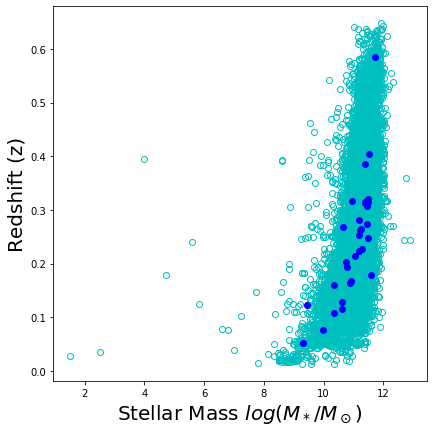

In [11]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
#rect_histx = [left, lower_h, width, 0.2]
#rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
#axHistx = plt.axes(rect_histx)
#axHisty = plt.axes(rect_histy)

binwidth = 0.5
bins=20

    # no labels
#axHistx.xaxis.set_major_formatter(nullfmt)
#axHisty.yaxis.set_major_formatter(nullfmt)

axScatter.plot(pg_parent_sample.lambdar_log_mstar, pg_parent_sample.z, 'co', fillstyle = 'none')
axScatter.plot(spec.lambdar_log_mstar, spec.z_lens, 'bo')

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)

#axHisty.hist(spec.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='b', histtype = 'step', linewidth=3)
#axHisty.hist(pg_sample.Z, orientation='horizontal', range=[0,0.8], bins=bins,color='c', histtype = 'step', linewidth=3)

#axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], bins=bins,color='b', histtype = 'step', linewidth=3)
#axHistx.hist(np.log10(pg_sample.STELLAR_MASS), range=[7,12], bins=bins,color='c', histtype = 'step', linewidth=3)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/spec_gama_pg_zmass.png')

# K-S tests of z and M*

In [12]:
sci.ks_2samp(spec.z_lens, pg_parent_sample.z)

Ks_2sampResult(statistic=0.07986366258936584, pvalue=0.9256189311198815)

In [13]:
sci.ks_2samp(spec.lambdar_mstar, 10**(pg_parent_sample.lambdar_log_mstar))

Ks_2sampResult(statistic=0.3738234172620682, pvalue=4.010179440909193e-06)

# AD tests of z and M*

In [55]:
sci.anderson_ksamp([spec.Z, pg.Z])

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: p-value floored: true value smaller than 0.001
  """Entry point for launching an IPython kernel.


Anderson_ksampResult(statistic=177.37253002455355, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

In [54]:
sci.anderson_ksamp([spec.STELLAR_MASS, pg.STELLAR_MASS])

/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: p-value floored: true value smaller than 0.001
  """Entry point for launching an IPython kernel.


Anderson_ksampResult(statistic=161.47716684141713, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

# Edit 08/12/20 - Histograms

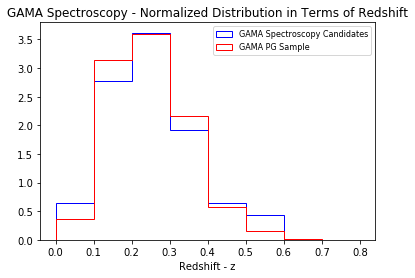

In [33]:
plt.hist(spec.z_lens, 
         histtype='step',
         density=True,
        color='b',
         range=(0, 0.8),
        bins=8,
        label='GAMA Spectroscopy Candidates')
plt.hist(pg.z,
        histtype='step',
         density=True,
        color='red',
        range=(0, 0.8),
        bins=8,
        label='GAMA PG Sample')
plt.legend(fontsize=8)
plt.xlabel('Redshift - z')
plt.title('GAMA Spectroscopy - Normalized Distribution in Terms of Redshift')

#plt.savefig(f'{png_path}spec_ks_histogram_z.png')
#plt.savefig(f'{pdf_path}spec_ks_histogram_z.pdf')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


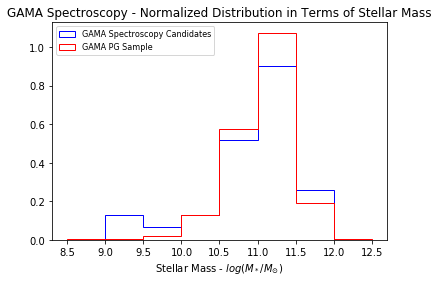

In [14]:
plt.hist(spec.lambdar_log_mstar, 
         histtype='step',
         density=True,
        color='b',
         range=(8.5, 12.5),
        bins=8,
        label='GAMA Spectroscopy Candidates')
plt.hist(pg.lambdar_log_mstar,
        histtype='step',
         density=True,
        color='red',
        range=(8.5, 12.5),
        bins=8,
        label='GAMA PG Sample')
plt.legend(fontsize=8, loc='upper left')
plt.xlabel('Stellar Mass - $log(M_*/M_{\odot})$')
plt.title('GAMA Spectroscopy - Normalized Distribution in Terms of Stellar Mass')

#plt.savefig(f'{png_path}spec_ks_histogram_mass.png')
#plt.savefig(f'{pdf_path}spec_ks_histogram_mass.pdf')

In [23]:
pg.lambdar_log_mstar.max()

12.91013

SyntaxError: invalid syntax (<ipython-input-26-de603c91038f>, line 1)